In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.feature_extraction import DictVectorizer

#from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 50)

In [3]:
df = pd.read_csv('Fire_Incidents.csv', delimiter=',')
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


### Preraration
- Prepare column names
- Find and replace NaN values
- Find duplicates

In [4]:
# Shorten column names where possible
df.columns = ['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time']

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.isnull().sum()

area_of_origin                               0
business_impact                              0
civilian_casualties                          0
persons_rescued                              0
estimated_dollar_loss                        0
estimated_number_of_persons_displaced        0
ext_agent_app_or_defer_time                  0
extent_of_fire                               0
fire_alarm_system_impact_on_evacuation       0
fire_alarm_system_operation                  0
fire_alarm_system_presence                   0
fire_under_control_time                      0
ignition_source                              0
incident_station_area                        0
incident_ward                               33
clear_time                                   0
latitude                                     0
longitude                                    0
material_first_ignited                       0
method_of_fire_control                       0
possible_cause                               0
property_use 

In [7]:
df.incident_ward = df.incident_ward.fillna(0)

In [8]:
df.duplicated().sum()

0

### EDA
- Explore target *estimated_dollar_loss*. Find outliners
- Explore features and feature importance
    - numerical
    - categorical
    - DataTime

#### Explore target

In [9]:
from scipy.stats import zscore

<AxesSubplot: xlabel='estimated_dollar_loss', ylabel='Count'>

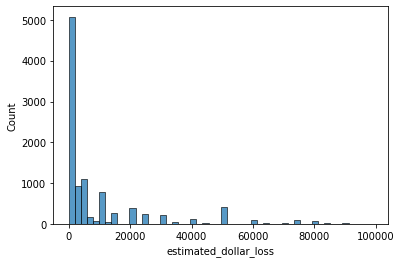

In [10]:
sns.histplot(df.estimated_dollar_loss[df.estimated_dollar_loss < 100000], bins = 50)

<AxesSubplot: xlabel='estimated_dollar_loss', ylabel='Count'>

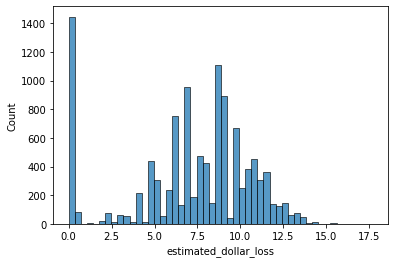

In [11]:
dollar_loss_logs = np.log1p(df.estimated_dollar_loss)
sns.histplot(dollar_loss_logs, bins = 50)

In [12]:
df['zs'] = zscore(dollar_loss_logs).abs().values
df.zs.sort_values(ascending=False).head(10)

1184    2.941376
7811    2.566648
7562    2.493664
7546    2.493664
7470    2.351563
7557    2.300845
7514    2.300845
9528    2.300845
1857    2.300845
8306    2.300845
Name: zs, dtype: float64

In [13]:
df['zs'] = zscore(df.estimated_dollar_loss).abs().values
outliners_list = df.index[df.zs > 3].tolist()
len(outliners_list)

26

In [14]:
df = df.drop(outliners_list)
len(df)

11188

In [15]:
del df['zs']

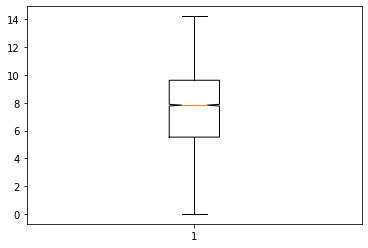

In [16]:
bp = plt.boxplot(np.log1p(df.estimated_dollar_loss), patch_artist=False,
                notch ='True')

In [17]:
for key in bp:
    print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')

whiskers: [array([5.52545294, 0.        ]), array([ 9.61587214, 14.22097633])]

caps: [array([0., 0.]), array([14.22097633, 14.22097633])]

boxes: [array([5.52545294, 5.52545294, 7.7637316 , 7.82444593, 7.88516027,
       9.61587214, 9.61587214, 7.88516027, 7.82444593, 7.7637316 ,
       5.52545294])]

medians: [array([7.82444593, 7.82444593])]

fliers: [array([], dtype=float64)]

means: []



#### Explore categorical

In [20]:
df.dtypes

area_of_origin                               object
business_impact                              object
civilian_casualties                           int64
persons_rescued                               int64
estimated_dollar_loss                         int64
estimated_number_of_persons_displaced         int64
ext_agent_app_or_defer_time                  object
extent_of_fire                               object
fire_alarm_system_impact_on_evacuation       object
fire_alarm_system_operation                  object
fire_alarm_system_presence                   object
fire_under_control_time                      object
ignition_source                              object
incident_station_area                         int64
incident_ward                               float64
clear_time                                   object
latitude                                    float64
longitude                                   float64
material_first_ignited                       object
method_of_fi

In [21]:
categorical = ['area_of_origin', 'business_impact',
               'extent_of_fire', 'fire_alarm_system_impact_on_evacuation',
               'fire_alarm_system_operation', 'fire_alarm_system_presence',
               'ignition_source','material_first_ignited', 'method_of_fire_control',
               'possible_cause', 'property_use', 'smoke_alarm_at_fire_origin_alarm_failure',
               'smoke_alarm_type', 'status_of_fire_on_arrival']

numerical = ['persons_rescued','civilian_casualties',
             'estimated_number_of_persons_displaced',
             'incident_station_area','latitude', 'longitude','incident_ward']

datetime = ['ext_agent_app_or_defer_time', 'fire_under_control_time', 'clear_time',
            'tfs_alarm_time', 'tfs_arrival_time']

In [22]:
for column in categorical:
    print(column, df[column].nunique())
    print(df[column].value_counts().head(5))
    print()
    print()

area_of_origin 73
Cooking Area or Kitchen                                             2869
Porch or Balcony                                                     950
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        867
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     751
Living Area (e.g. living, TV, recreation, etc)                       593
Name: area_of_origin, dtype: int64


business_impact 7
Not applicable (not a business)         5098
No business interruption                4489
Undetermined                             741
May resume operations within a week      641
May resume operations within a month     126
Name: business_impact, dtype: int64


extent_of_fire 12
Confined to object of origin                5121
Confined to part of room/area of origin     4083
Spread to entire room of origin              481
Spread beyond room of origin, same floor     467
Confined to roof/exterior structure          341
Name: extent_of_fire, dtype: int64



In [23]:
df[categorical].nunique()

area_of_origin                               73
business_impact                               7
extent_of_fire                               12
fire_alarm_system_impact_on_evacuation        7
fire_alarm_system_operation                   4
fire_alarm_system_presence                    4
ignition_source                              82
material_first_ignited                       54
method_of_fire_control                        5
possible_cause                               24
property_use                                217
smoke_alarm_at_fire_origin_alarm_failure     11
smoke_alarm_type                              6
status_of_fire_on_arrival                     8
dtype: int64

#### Feature Importance of Categorical

In [24]:
qloss = pd.qcut(np.log1p(df.estimated_dollar_loss), q=7)

In [25]:
def mi_score(series):
    return mutual_info_score(qloss, series)

In [26]:
mi = df[categorical].apply(mi_score)
mi.sort_values(ascending=False)

extent_of_fire                              0.266265
material_first_ignited                      0.147757
area_of_origin                              0.147311
status_of_fire_on_arrival                   0.121888
property_use                                0.120933
method_of_fire_control                      0.098502
ignition_source                             0.095544
possible_cause                              0.063709
business_impact                             0.059917
fire_alarm_system_operation                 0.025569
smoke_alarm_at_fire_origin_alarm_failure    0.023212
fire_alarm_system_impact_on_evacuation      0.020684
fire_alarm_system_presence                  0.020058
smoke_alarm_type                            0.017953
dtype: float64

#### Feature Importance and exploration of Numerical

In [27]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,civilian_casualties,persons_rescued,estimated_dollar_loss,estimated_number_of_persons_displaced,incident_station_area,incident_ward,latitude,longitude
count,11188.000,11188.000,11188.000,11188.000,11188.000,11188.000,11188.000,11188.000
mean,0.113,0.062,29739.058,16.609,288.290,19.529,43.705,-79.403
std,0.457,0.961,94337.280,116.422,107.497,11.794,0.051,0.101
min,0.000,0.000,0.000,0.000,111.000,0.000,43.589,-79.635
25%,0.000,0.000,250.000,0.000,221.000,9.750,43.662,-79.479
50%,0.000,0.000,2500.000,0.000,314.000,19.000,43.697,-79.404
75%,0.000,0.000,15000.000,1.000,346.000,28.000,43.748,-79.337
max,15.000,86.000,1500000.000,999.000,445.000,44.000,43.846,-79.124


[Text(0, 1, 'persons_rescued'),
 Text(0, 2, 'civilian_casualties'),
 Text(0, 3, 'estimated_number_of_persons_displaced'),
 Text(0, 4, 'incident_station_area'),
 Text(0, 5, 'latitude'),
 Text(0, 6, 'longitude'),
 Text(0, 7, 'incident_ward')]

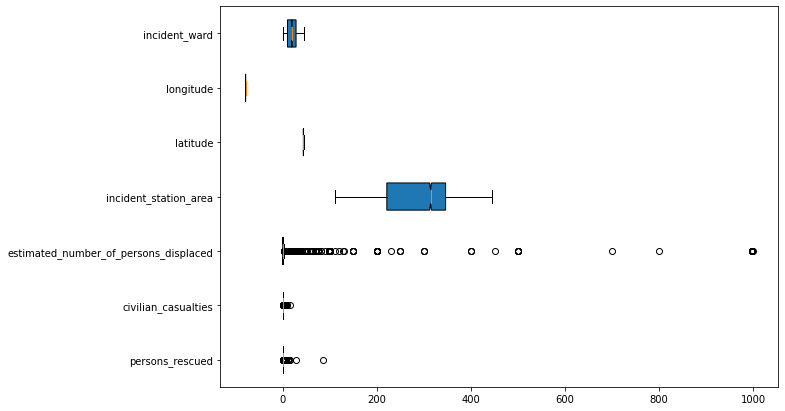

In [28]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(df[numerical], patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(numerical)

In [29]:
df[numerical].corrwith(np.log1p(df.estimated_dollar_loss)).abs().sort_values(ascending=False)

civilian_casualties                      0.130231
estimated_number_of_persons_displaced    0.121488
latitude                                 0.090766
persons_rescued                          0.047881
longitude                                0.017919
incident_station_area                    0.015870
incident_ward                            0.002858
dtype: float64

#### Deaing with date-time values and exploring date-time 

In [30]:
for column in datetime:
    df[column] = pd.to_datetime(df[column],
                                format = '%Y-%m-%dT%H:%M:%S',
                                errors = 'coerce')

In [31]:
print((df.tfs_alarm_time.dt.day == df.tfs_arrival_time.dt.day).sum(), 'alarm and arraival in a 1 day'),
print((df.tfs_arrival_time.dt.day == df.ext_agent_app_or_defer_time.dt.day).sum(), 'arrival and ext agent in a 1 day'),
print((df.ext_agent_app_or_defer_time.dt.day == df.fire_under_control_time.dt.day).sum(), 'ext agent and fire control in a 1 day' ),
print((df.fire_under_control_time.dt.day == df.clear_time.dt.day).sum(), 'fire control and cleaning in a 1 day'),
print((df.tfs_alarm_time.dt.day == df.clear_time.dt.day).sum(), 'the whole incedent in a 1 day')
print((df.tfs_alarm_time.dt.day > df.clear_time.dt.day).sum(), 'the cleaning was before the alarm')

11156 alarm and arraival in a 1 day
11118 arrival and ext agent in a 1 day
11111 ext agent and fire control in a 1 day
10578 fire control and cleaning in a 1 day
10433 the whole incedent in a 1 day
22 the cleaning was before the alarm


In [32]:
# 24 records contains the cleaning after the incedent time before the alarm
# delite this records to not confuse the model
indexTime = df[df['tfs_alarm_time'] > df['clear_time']].index
df.drop(indexTime, inplace=True)

In [33]:
# for the purpose of this model we don't need 'year' and 'second' info.
# Also a weekday information will be added only for tfs_alarm_time - the date when incedent occures

datetime_splited = []
for column in datetime:
    df[column + '_month'] = df[column].dt.month
    datetime_splited.append((column + '_month'))
    
    df[column + '_day'] = df[column].dt.day
    datetime_splited.append((column + '_day'))
    
    df[column + '_hour'] = df[column].dt.hour
    datetime_splited.append((column + '_hour'))
    
    df[column + '_minute'] = df[column].dt.minute
    datetime_splited.append((column + '_minute'))
    
df['tfs_alarm_time_weekday'] = df.tfs_alarm_time.dt.dayofweek
datetime_splited.append('tfs_alarm_time_weekday')

df[datetime_splited].head()

,ext_agent_app_or_defer_time_month,ext_agent_app_or_defer_time_day,ext_agent_app_or_defer_time_hour,ext_agent_app_or_defer_time_minute,fire_under_control_time_month,fire_under_control_time_day,fire_under_control_time_hour,fire_under_control_time_minute,clear_time_month,clear_time_day,clear_time_hour,clear_time_minute,tfs_alarm_time_month,tfs_alarm_time_day,tfs_alarm_time_hour,tfs_alarm_time_minute,tfs_arrival_time_month,tfs_arrival_time_day,tfs_arrival_time_hour,tfs_arrival_time_minute,tfs_alarm_time_weekday
0,8,24,17,6,8,24,17,6,8,24,17,42,8,24,16,49,8,24,16,54,4
1,11,24,7,19,11,24,7,19,11,24,12,45,11,24,7,9,11,24,7,14,5
2,2,9,18,2,2,9,18,36,2,9,23,36,2,9,17,45,2,9,17,48,3
3,10,30,0,52,10,30,1,28,11,1,16,30,10,30,0,42,10,30,0,44,1
4,7,8,4,35,7,8,4,38,7,8,16,44,7,8,4,8,7,8,4,13,6


#### Datetime feature importances. Selecting representation of date time data
Date and Time data can be represented as DataTime format, separate columns of month, day etc. or as a difference between dates. 

**DataTime format**

In [34]:
def mi_score_DateTime(series):
    return normalized_mutual_info_score(qloss, series)

In [35]:
mi = df[datetime].apply(mi_score_DateTime)
mi.sort_values(ascending=False)

tfs_alarm_time                 0.339322
tfs_arrival_time               0.339322
clear_time                     0.339303
ext_agent_app_or_defer_time    0.339270
fire_under_control_time        0.339201
dtype: float64

**Separated columns**

In [36]:
df[datetime_splited].corrwith(np.log1p(df.estimated_dollar_loss)).abs().sort_values(ascending=False)

tfs_alarm_time_hour                   0.059466
tfs_arrival_time_hour                 0.058152
fire_under_control_time_hour          0.057538
ext_agent_app_or_defer_time_hour      0.055937
clear_time_hour                       0.028965
tfs_alarm_time_weekday                0.019362
clear_time_month                      0.009243
fire_under_control_time_minute        0.008636
clear_time_minute                     0.007780
tfs_alarm_time_month                  0.007745
tfs_arrival_time_month                0.007740
fire_under_control_time_month         0.007717
ext_agent_app_or_defer_time_month     0.007717
tfs_arrival_time_minute               0.007414
ext_agent_app_or_defer_time_minute    0.004618
clear_time_day                        0.002361
ext_agent_app_or_defer_time_day       0.002195
tfs_arrival_time_day                  0.001963
tfs_alarm_time_day                    0.001868
fire_under_control_time_day           0.001578
tfs_alarm_time_minute                 0.000365
dtype: float6

**Difference between dates**

In [39]:
total_time = (df.clear_time - df.tfs_alarm_time).dt.total_seconds()/(60*60)
total_time.corr(np.log1p(df.estimated_dollar_loss))

0.2975028398415431

In [40]:
arrival_time = (df.tfs_arrival_time - df.tfs_alarm_time).dt.total_seconds()/(60*60)
arrival_time.corr(np.log1p(df.estimated_dollar_loss))

0.035601779251584385

In [41]:
fire_control_time = (df.fire_under_control_time - df.tfs_arrival_time).dt.total_seconds()/(60*60)
fire_control_time.corr(np.log1p(df.estimated_dollar_loss))

0.20263728814725668

In [42]:
cleaning_time = (df.clear_time - df.fire_under_control_time).dt.total_seconds()/(60*60)
cleaning_time.corr(np.log1p(df.estimated_dollar_loss))

0.29160329806771135

In [43]:
fire_time = (df.fire_under_control_time - df.tfs_alarm_time).dt.total_seconds()/(60*60)
fire_time.corr(np.log1p(df.estimated_dollar_loss))

0.2045540989697087

Let's use data time features both at DataTime format and difference between dates and get rid of separate columns

In [44]:
df.drop(['ext_agent_app_or_defer_time_month', 'ext_agent_app_or_defer_time_day',
 'ext_agent_app_or_defer_time_hour',
 'ext_agent_app_or_defer_time_minute',
 'fire_under_control_time_month',
 'fire_under_control_time_day',
 'fire_under_control_time_hour',
 'fire_under_control_time_minute',
 'clear_time_month',
 'clear_time_day',
 'clear_time_hour',
 'clear_time_minute',
 'tfs_alarm_time_month',
 'tfs_alarm_time_day',
 'tfs_alarm_time_hour',
 'tfs_alarm_time_minute',
 'tfs_arrival_time_month',
 'tfs_arrival_time_day',
 'tfs_arrival_time_hour',
 'tfs_arrival_time_minute',
 'tfs_alarm_time_weekday'],
        axis=1, inplace=True)

df.head()

,area_of_origin,business_impact,civilian_casualties,persons_rescued,estimated_dollar_loss,estimated_number_of_persons_displaced,ext_agent_app_or_defer_time,extent_of_fire,fire_alarm_system_impact_on_evacuation,fire_alarm_system_operation,fire_alarm_system_presence,fire_under_control_time,ignition_source,incident_station_area,incident_ward,clear_time,latitude,longitude,material_first_ignited,method_of_fire_control,possible_cause,property_use,smoke_alarm_at_fire_origin_alarm_failure,smoke_alarm_type,status_of_fire_on_arrival,tfs_alarm_time,tfs_arrival_time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24 17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24 17:06:28,Undetermined,114,18.0,2018-08-24 17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24 07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24 12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09 18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09 18:36:21,Undetermined,325,27.0,2017-02-09 23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30 00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,2012-11-01 16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08 04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08 16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [45]:
# convert datetime columns to int because scikit-learn doesn't work well with pandas.TimeStamp
df[datetime] = df[datetime].astype(np.int64)

In [46]:
df['total_time'] = total_time
df['fire_control_time'] = fire_control_time
df['cleaning_time'] = cleaning_time
df['fire_time'] = fire_time

In [47]:
df.to_csv('df_prepared', sep=',', encoding='utf-8', index=False)

### Prepare training and validation sets
We will prepair two pairs of train/validation data. 
- the first is with all features
- the second is with features with the hightes mutal information and correlation score (mi >= 0.1, correlation score >=0.1)

In [48]:
df_full_train1, df_test1 = train_test_split(df,
                                            test_size=0.2,
                                            random_state=2)
df_train1, df_val1 = train_test_split(df_full_train1,
                                      test_size=0.25,
                                      random_state=2)

In [49]:
df_train1 = df_train1.reset_index(drop=True)
df_val1 = df_val1.reset_index(drop=True)
df_test1 = df_test1.reset_index(drop=True)
print(df_train1.estimated_dollar_loss.mean(), df_val1.estimated_dollar_loss.mean(), df_test1.estimated_dollar_loss.mean())

30112.970649582836 28094.030831099197 30262.680071492403


In [50]:
selected = ['extent_of_fire', 'material_first_ignited', 'area_of_origin',
            'status_of_fire_on_arrival', 'property_use', 'estimated_number_of_persons_displaced',
            'civilian_casualties', 'tfs_alarm_time', 'tfs_arrival_time',
            'clear_time', 'ext_agent_app_or_defer_time', 'fire_under_control_time',
            'total_time', 'fire_control_time', 'cleaning_time', 'fire_time']

In [51]:
df_full_train2, df_test2 = train_test_split(df[selected], test_size=0.2, random_state=1)
df_train2, df_val2 = train_test_split(df_full_train2, test_size=0.25, random_state=1)

In [52]:
df_train2 = df_train2.reset_index(drop=True)
df_val2 = df_val2.reset_index(drop=True)
df_test2 = df_test2.reset_index(drop=True)

In [53]:
y_train = np.log1p(df_train1.estimated_dollar_loss.values)
y_val = np.log1p(df_val1.estimated_dollar_loss.values)
y_test = np.log1p(df_test1.estimated_dollar_loss.values)

In [54]:
del df_train1['estimated_dollar_loss']
del df_val1['estimated_dollar_loss']
del df_test1['estimated_dollar_loss']

In [55]:
y_full_train = np.log1p(df_full_train1.estimated_dollar_loss.values)

In [56]:
del df_full_train1['estimated_dollar_loss']

### Training
for the regression problem we will train the following models:  
- Linear regression
- DecisionTreeRegression
- RandomForestRegressor
- Gradient boosting
- Rige

In [57]:
from sklearn.metrics import r2_score

In [58]:
result = pd.DataFrame(columns = ['model', 'set', 'rmse', 'r2'])

#### Linear regression

In [59]:
dv1 = DictVectorizer(sparse=False)
train_dict1 = df_train1.to_dict(orient='records')
X_train1 = dv1.fit_transform(train_dict1)

LR1 = LinearRegression()
LR1.fit(X_train1, y_train)

LinearRegression()

In [60]:
val_dict1 = df_val1.to_dict(orient='records')
X_val1 = dv1.transform(val_dict1)

In [61]:
y_pred1 = LR1.predict(X_val1)

In [62]:
rmse1 = mean_squared_error(y_val, y_pred1, squared=False).round(2)
r2 = r2_score(y_val, y_pred1)

In [63]:
result.loc[len(result)] = ['LinearRegression', 'all features', rmse1, r2]

In [64]:
dv2 = DictVectorizer(sparse=False)
train_dict2 = df_train2.to_dict(orient='records')
X_train2 = dv2.fit_transform(train_dict2)

LR2 = LinearRegression()
LR2.fit(X_train2, y_train)

LinearRegression()

In [65]:
val_dict2 = df_val2.to_dict(orient='records')
X_val2 = dv2.transform(val_dict2)
y_pred2 = LR2.predict(X_val2)
rmse2 = mean_squared_error(y_val, y_pred2, squared=False).round(2)
r2 = r2_score(y_val, y_pred2)

In [66]:
result.loc[len(result)] = ['LinearRegression', 'top features', rmse2, r2]

#### DecisionTreeRegression

In [67]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(X_train1, y_train)

DecisionTreeRegressor()

In [68]:
y_pred1 = dtr1.predict(X_val1)
rmse3 = mean_squared_error(y_val, y_pred1, squared=False).round(2)
r2 = r2_score(y_val, y_pred1)

In [69]:
result.loc[len(result)] = ['DecisionTreeRegressor', 'all features', rmse3, r2]

In [70]:
dtr2 = DecisionTreeRegressor()
dtr2.fit(X_train2, y_train)
y_pred2 = dtr2.predict(X_val2)
rmse4 = mean_squared_error(y_val, y_pred2, squared=False).round(2)
r2 = r2_score(y_val, y_pred2)

In [71]:
result.loc[len(result)] = ['DecisionTreeRegressor', 'top features', rmse4, r2]

#### RandomForestRegressor

In [72]:
RF1 = RandomForestRegressor()
RF1.fit(X_train1, y_train)
y_pred1 = RF1.predict(X_val1)
rmse5 = mean_squared_error(y_val, y_pred1, squared=False).round(2)
r2 = r2_score(y_val, y_pred1)

In [73]:
result.loc[len(result)] = ['RandomForestRegressor', 'all features', rmse5, r2]

In [74]:
RF2 = RandomForestRegressor()
RF2.fit(X_train2, y_train)
y_pred2 = RF2.predict(X_val2)
rmse6 = mean_squared_error(y_val, y_pred2, squared=False).round(2)
r2 = r2_score(y_val, y_pred2)

In [75]:
result.loc[len(result)] = ['RandomForestRegressor', 'top features', rmse6, r2]

#### Gradient boosting

In [76]:
import xgboost as xgb

In [77]:
features1 = dv1.get_feature_names_out()
dtrain1 = xgb.DMatrix(X_train1, label=y_train, feature_names=features1)
dval1 = xgb.DMatrix(X_val1, label=y_val, feature_names=features1)

In [78]:
xgb_params = {
    'seed': 1,
    'verbosity': 1
}

xgb1 = xgb.train(xgb_params, dtrain1)
y_pred1 = xgb1.predict(dval1)
rmse7 = mean_squared_error(y_val, y_pred1, squared=False).round(2)
r2 = r2_score(y_val, y_pred1)

In [79]:
result.loc[len(result)] = ['xgboost', 'all features', rmse7, r2]

In [80]:
features2 = dv2.get_feature_names_out()
dtrain2 = xgb.DMatrix(X_train2, label=y_train, feature_names=features2)
dval2 = xgb.DMatrix(X_val2, label=y_val, feature_names=features2)

In [81]:
xgb_params = {
    'seed': 1,
    'verbosity': 1
}

xgb2 = xgb.train(xgb_params, dtrain2)
y_pred2 = xgb2.predict(dval2)
rmse8 = mean_squared_error(y_val, y_pred2, squared=False).round(2)
r2 = r2_score(y_val, y_pred2)

In [82]:
result.loc[len(result)] = ['xgboost', 'top features', rmse8, r2]

**Rige**

In [83]:
from sklearn.linear_model import Ridge

In [84]:
R1 = Ridge(normalize=True)
R1.fit(X_train1, y_train)
y_pred1 = R1.predict(X_val1)
rmse9 = mean_squared_error(y_val, y_pred1, squared=False).round(2)
r2 = r2_score(y_val, y_pred1)

/Users/ekaterinakutovaia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [85]:
result.loc[len(result)] = ['Ridge', 'all features', rmse9, r2]

In [86]:
R2 = Ridge(normalize=True)
R2.fit(X_train2, y_train)
y_pred2 = R2.predict(X_val2)
rmse10 = mean_squared_error(y_val, y_pred2, squared=False).round(2)
r2 = r2_score(y_val, y_pred2)
result.loc[len(result)] = ['Ridge', 'top features', rmse10, r2]

/Users/ekaterinakutovaia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [87]:
result.sort_values(by='rmse')

,model,set,rmse,r2
4,RandomForestRegressor,all features,2.22,0.610500
6,xgboost,all features,2.23,0.607790
8,Ridge,all features,2.42,0.538900
2,DecisionTreeRegressor,all features,3.20,0.192227
0,LinearRegression,all features,3.50,0.031797
1,LinearRegression,top features,3.56,0.000135
7,xgboost,top features,3.57,-0.005836
9,Ridge,top features,3.57,-0.007810
5,RandomForestRegressor,top features,3.63,-0.039294
3,DecisionTreeRegressor,top features,5.10,-1.059423


### Parameter tuning
We will tune parametres for the following models. 
- DecisionTreeRegressor	all features (3.2)
- RandomForestRegressor	all features (2.22)
- xgboost	all features (2.23)
- Ridge	all features	(2.42)

In [88]:
final_result = pd.DataFrame(columns = ['Model', 'rmse', 'r2'])

**DecisionTreeRegressor**

In [89]:
#depth should be 4-6
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dtr1 = DecisionTreeRegressor(max_depth=d)
    dtr1.fit(X_train1, y_train)
    y_pred1 = dtr1.predict(X_val1)
    rmse = mean_squared_error(y_val, y_pred1, squared=False).round(2)
    print(d, rmse)

1 3.08
2 2.76
3 2.56
4 2.46
5 2.4
6 2.43
10 2.72
15 2.95
20 3.09
None 3.15


In [90]:
scores = []
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dtr1 = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        dtr1.fit(X_train1, y_train)
        y_pred1 = dtr1.predict(X_val1)
        rmse = mean_squared_error(y_val, y_pred1, squared=False).round(3)
        r2 = r2_score(y_val, y_pred1).round(3)
        scores.append((d, s, rmse, r2))

In [91]:
columns = ['max_depth', 'min_samples_leaf', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse')

,max_depth,min_samples_leaf,rmse,r2
23,6,20,2.376,0.554
21,6,10,2.386,0.550
22,6,15,2.392,0.548
12,5,10,2.392,0.548
14,5,20,2.393,0.547
13,5,15,2.401,0.544
11,5,5,2.402,0.544
9,5,1,2.405,0.543
10,5,2,2.405,0.543
20,6,5,2.411,0.541


In [92]:
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=15)
dtr.fit(X_train1, y_train)
y_pred = dtr.predict(X_val1)
rmse = mean_squared_error(y_val, y_pred, squared=False).round(2)
r2 = r2_score(y_val, y_pred)

In [93]:
final_result.loc[len(final_result)] = ['DecisionTreeRegressor', rmse, r2]

**RandomForestRegressor**

In [94]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train1, y_train)
    y_pred = rf.predict(X_val1)
    rmse = mean_squared_error(y_val, y_pred, squared=False).round(3)
    r2 = r2_score(y_val, y_pred).round(3)
    scores.append((n, rmse, r2))

In [95]:
columns = ['n_estimators', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse', ascending=True)

,n_estimators,rmse,r2
18,190,2.221,0.610
17,180,2.222,0.610
16,170,2.222,0.610
19,200,2.223,0.610
15,160,2.224,0.609
14,150,2.224,0.609
13,140,2.224,0.609
12,130,2.224,0.609
11,120,2.226,0.608
10,110,2.226,0.608


(2.22, 2.28)

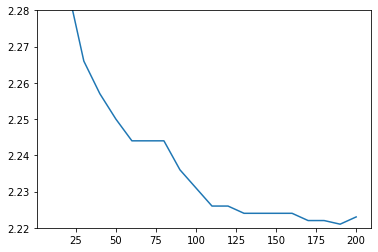

In [96]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.ylim(2.22, 2.28)

In [97]:
scores = []
for d in [5, 10, 15]:
    for n in range(50, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train1, y_train)
        y_pred = rf.predict(X_val1)
        rmse = mean_squared_error(y_val, y_pred, squared=False).round(3)
        r2 = r2_score(y_val, y_pred).round(3)
        scores.append((n, d, rmse, r2))

In [98]:
columns = ['n_estimators', 'max_depth', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse', ascending=True).head(10)

,n_estimators,max_depth,rmse,r2
46,190,15,2.225,0.609
44,170,15,2.226,0.608
47,200,15,2.226,0.608
45,180,15,2.226,0.608
42,150,15,2.227,0.608
43,160,15,2.228,0.608
41,140,15,2.229,0.607
40,130,15,2.229,0.607
38,110,15,2.230,0.607
39,120,15,2.231,0.607


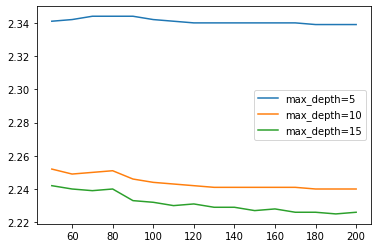

In [99]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [100]:
scores = []
for d in [20, 10, 15]:
    for n in range(50, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train1, y_train)
        y_pred = rf.predict(X_val1)
        rmse = mean_squared_error(y_val, y_pred, squared=False).round(3)
        r2 = r2_score(y_val, y_pred).round(3)
        scores.append((n, d, rmse, r2))

In [101]:
columns = ['n_estimators', 'max_depth', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse', ascending=True).head(10)

,n_estimators,max_depth,rmse,r2
14,190,20,2.224,0.609
13,180,20,2.224,0.609
12,170,20,2.224,0.609
46,190,15,2.225,0.609
10,150,20,2.225,0.609
9,140,20,2.225,0.609
15,200,20,2.225,0.609
47,200,15,2.226,0.608
11,160,20,2.226,0.608
8,130,20,2.226,0.608


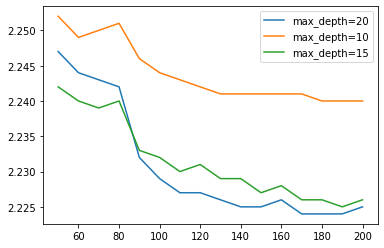

In [102]:
for d in [20, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [103]:
scores = []
for n in range(50, 201, 10):
    for s in [1, 3, 5, 10, 50]:
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=20,
                                   min_samples_leaf=s,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train1, y_train)
        y_pred = rf.predict(X_val1)
        rmse = mean_squared_error(y_val, y_pred, squared=False).round(3)
        r2 = r2_score(y_val, y_pred).round(3)
        scores.append((n, s, rmse, r2))

In [104]:
columns = ['n_estimators', 'min_samples_leaf', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse', ascending=True).head(10)

,n_estimators,min_samples_leaf,rmse,r2
61,170,3,2.206,0.615
71,190,3,2.206,0.615
66,180,3,2.206,0.615
76,200,3,2.206,0.615
56,160,3,2.207,0.615
72,190,5,2.207,0.615
67,180,5,2.207,0.615
62,170,5,2.208,0.615
77,200,5,2.208,0.615
41,130,3,2.208,0.615


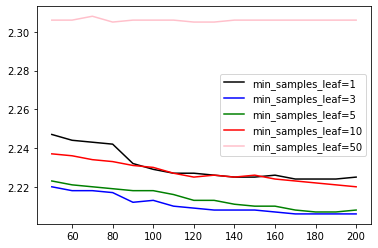

In [105]:
colors = ['black', 'blue', 'green', 'red', 'pink']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [106]:
scores = []
for s in [1, 3, 5, 10, 50]:
    for n in [15, 20]:
        rf = RandomForestRegressor(n_estimators=130,
                                    max_depth=n,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train1, y_train)
        y_pred = rf.predict(X_val1)
        rmse = mean_squared_error(y_val, y_pred, squared=False).round(3)
        r2 = r2_score(y_val, y_pred).round(3)
        scores.append((n, s, rmse, r2))

In [107]:
columns = ['max_depth', 'min_samples_leaf', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse', ascending=True).head(10)

,max_depth,min_samples_leaf,rmse,r2
3,20,3,2.208,0.615
2,15,3,2.211,0.613
4,15,5,2.213,0.613
5,20,5,2.213,0.613
1,20,1,2.226,0.608
6,15,10,2.226,0.608
7,20,10,2.226,0.608
0,15,1,2.229,0.607
8,15,50,2.305,0.580
9,20,50,2.305,0.580


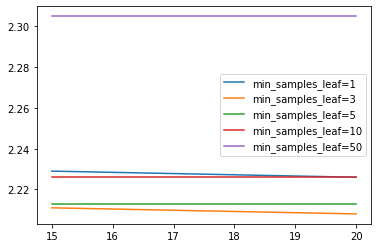

In [108]:
for d in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == d]
    
    plt.plot(df_subset.max_depth, df_subset.rmse,
             label='min_samples_leaf=%d' % d)

plt.legend()

In [109]:
rf = RandomForestRegressor(n_estimators=130,
                           max_depth=15,
                           random_state=1,
                           min_samples_leaf=3,
                           n_jobs=-1)
rf.fit(X_train1, y_train)
y_pred = rf.predict(X_val1)
rmse = mean_squared_error(y_val, y_pred, squared=False).round(3)
r2 = r2_score(y_val, y_pred).round(3)
final_result.loc[len(final_result)] = ['RandomForestRegressor', rmse, r2]

#### Rige

In [110]:
scores = []
for a in [0.2, 0.4, 0.6, 0.8, 1, 2, 5]:
    R = Ridge(normalize=True,
             alpha=a)
    R.fit(X_train1, y_train)
    y_pred = R.predict(X_val1)
    rmse = mean_squared_error(y_val, y_pred, squared=False).round(2)
    r2 = r2_score(y_val, y_pred).round(2)
    
    scores.append((a, rmse, r2))

/Users/ekaterinakutovaia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/ekaterinakutovaia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

In [111]:
columns = ['alpha', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='rmse', ascending=True).head(10)

,alpha,rmse,r2
0,0.2,2.34,0.57
1,0.4,2.35,0.56
2,0.6,2.37,0.56
3,0.8,2.39,0.55
4,1.0,2.42,0.54
5,2.0,2.54,0.49
6,5.0,2.82,0.37


In [112]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [113]:
R = Ridge(normalize=True,
             alpha=0.2)
R.fit(X_train1, y_train)
y_pred = R.predict(X_val1)
rmse = mean_squared_error(y_val, y_pred, squared=False).round(2)
r2 = r2_score(y_val, y_pred).round(2)
final_result.loc[len(final_result)] = ['Ridge', rmse, r2]

/Users/ekaterinakutovaia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


#### xgb

In [114]:
features = dv1.get_feature_names_out()
dtrain = xgb.DMatrix(X_train1, label=y_train, feature_names=features1)
dval = xgb.DMatrix(X_val1, label=y_val, feature_names=features1)

In [115]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [116]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

**eta**

In [117]:
scores = {}

In [149]:
%%capture output
for e in [0.3, 0.01, 0.1, 1, 0.05]:
    xgb_params = {'eta': e, 
              'max_depth': 6,
              'min_child_weight': 1,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
                 }

    model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)
    key = 'eta=%s' % (xgb_params['eta'])

In [158]:
df_score = parse_xgb_output(output)
df_score_03 = df_score.iloc[0:41]
df_score_001 = df_score.iloc[41:82]
df_score_01 = df_score.iloc[82:123]
df_score_1 = df_score.iloc[123:164]
df_score_005 = df_score.iloc[165:205]

(2.15, 2.5)

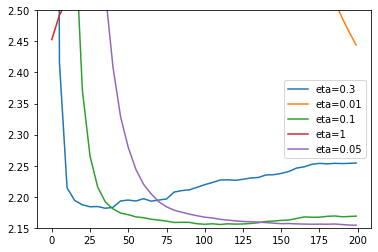

In [160]:
plt.plot(df_score_03.num_iter, df_score_03.val_rmse, label='eta=0.3')
plt.plot(df_score_001.num_iter, df_score_001.val_rmse, label='eta=0.01')
plt.plot(df_score_01.num_iter, df_score_01.val_rmse, label='eta=0.1')
plt.plot(df_score_1.num_iter, df_score_1.val_rmse, label='eta=1')
plt.plot(df_score_005.num_iter, df_score_005.val_rmse, label='eta=0.05')
plt.legend()
plt.ylim(2.15, 2.5)

**max_depth**

In [161]:
scores = {}

In [166]:
%%capture output
for md in [6, 3, 4, 10]:
    xgb_params = {'eta': 0.1, 
              'max_depth': md,
              'min_child_weight': 1,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
                 }

    model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [167]:
df_score = parse_xgb_output(output)
df_score_6 = df_score.iloc[0:41]
df_score_3 = df_score.iloc[41:82]
df_score_4 = df_score.iloc[82:123]
df_score_10 = df_score.iloc[123:164]

(2.14, 2.4)

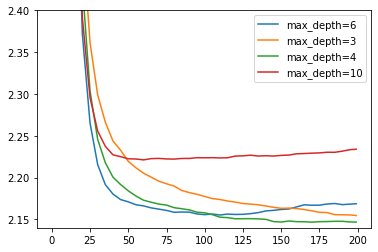

In [170]:
plt.plot(df_score_6.num_iter, df_score_6.val_rmse, label='max_depth=6')
plt.plot(df_score_3.num_iter, df_score_3.val_rmse, label='max_depth=3')
plt.plot(df_score_4.num_iter, df_score_4.val_rmse, label='max_depth=4')
plt.plot(df_score_10.num_iter, df_score_10.val_rmse, label='max_depth=10')
plt.legend()
plt.ylim(2.14, 2.4)

**min_child_weight (eta=0.1)**

In [171]:
scores = {}

In [172]:
%%capture output
for mc in [1, 5, 10, 30]:
    xgb_params = {'eta': 0.1, 
              'max_depth': 4,
              'min_child_weight':mc,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
                 }

    model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [173]:
df_score = parse_xgb_output(output)
df_score_1 = df_score.iloc[0:41]
df_score_5 = df_score.iloc[41:82]
df_score_10 = df_score.iloc[82:123]
df_score_30 = df_score.iloc[123:164]

(2.12, 2.25)

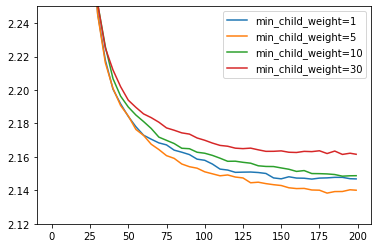

In [176]:
plt.plot(df_score_1.num_iter, df_score_1.val_rmse, label='min_child_weight=1')
plt.plot(df_score_5.num_iter, df_score_5.val_rmse, label='min_child_weight=5')
plt.plot(df_score_10.num_iter, df_score_10.val_rmse, label='min_child_weight=10')
plt.plot(df_score_30.num_iter, df_score_30.val_rmse, label='min_child_weight=30')
plt.legend()
plt.ylim(2.12, 2.25)

**main parametres are tuned**
- eta = 0.1
- max_depth = 4
- min_cild_wheit = 5
- trees = 140

**colsample_bytree** 

In [177]:
scores = {}

In [178]:
%%capture output
for cb in [1, 0.5, 0.2]:
    xgb_params = {'eta': 0.1, 
              'max_depth': 4,
              'min_child_weight':5,
              'colsample_bytree':cb,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
                 }

    model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [179]:
df_score = parse_xgb_output(output)
df_score_1 = df_score.iloc[0:41]
df_score_05 = df_score.iloc[41:82]
df_score_02 = df_score.iloc[82:123]

(2.1, 2.2)

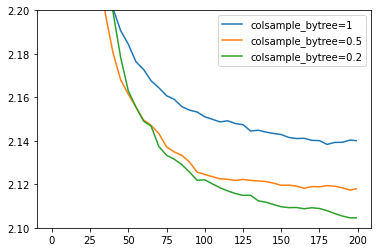

In [181]:
plt.plot(df_score_1.num_iter, df_score_1.val_rmse, label='colsample_bytree=1')
plt.plot(df_score_05.num_iter, df_score_05.val_rmse, label='colsample_bytree=0.5')
plt.plot(df_score_02.num_iter, df_score_02.val_rmse, label='colsample_bytree=0.2')
plt.legend()
plt.ylim(2.1, 2.2)

**subsample**

In [182]:
scores = {}

In [184]:
%%capture output
for s in [1, 0.5, 0.2]:
    xgb_params = {'eta': 0.1, 
              'max_depth': 4,
              'min_child_weight':5,
              'colsample_bytree':0.2,
              'subsample': s,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
             }

    model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [185]:
df_score = parse_xgb_output(output)
df_score_1 = df_score.iloc[0:41]
df_score_05 = df_score.iloc[41:82]
df_score_02 = df_score.iloc[82:123]

(2.1, 2.2)

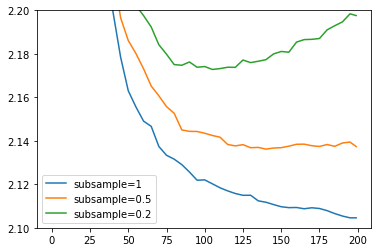

In [188]:
plt.plot(df_score_1.num_iter, df_score_1.val_rmse, label='subsample=1')
plt.plot(df_score_05.num_iter, df_score_05.val_rmse, label='subsample=0.5')
plt.plot(df_score_02.num_iter, df_score_02.val_rmse, label='subsample=0.2')
plt.legend()
plt.ylim(2.1, 2.2)

**final xgb model**

In [189]:
xgb_params = {'eta': 0.1, 
              'max_depth': 4,
              'min_child_weight':5,
              'colsample_bytree':0.2,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
}

model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=140)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False).round(2)
r2 = r2_score(y_val, y_pred)
rmse, r2

[0]	train-rmse:6.92419	val-rmse:6.90042
[5]	train-rmse:4.61995	val-rmse:4.60460
[10]	train-rmse:3.41938	val-rmse:3.39542
[15]	train-rmse:2.80995	val-rmse:2.77242
[20]	train-rmse:2.51469	val-rmse:2.48577
[25]	train-rmse:2.36151	val-rmse:2.34327
[30]	train-rmse:2.28361	val-rmse:2.27223
[35]	train-rmse:2.23743	val-rmse:2.23138
[40]	train-rmse:2.19587	val-rmse:2.19932
[45]	train-rmse:2.16586	val-rmse:2.17847
[50]	train-rmse:2.14781	val-rmse:2.16302
[55]	train-rmse:2.13091	val-rmse:2.15559
[60]	train-rmse:2.11674	val-rmse:2.14906
[65]	train-rmse:2.10497	val-rmse:2.14666
[70]	train-rmse:2.09083	val-rmse:2.13739
[75]	train-rmse:2.08047	val-rmse:2.13336
[80]	train-rmse:2.06934	val-rmse:2.13157
[85]	train-rmse:2.05810	val-rmse:2.12906
[90]	train-rmse:2.05145	val-rmse:2.12565
[95]	train-rmse:2.04367	val-rmse:2.12188
[100]	train-rmse:2.03418	val-rmse:2.12204
[105]	train-rmse:2.02749	val-rmse:2.12022
[110]	train-rmse:2.01950	val-rmse:2.11840
[115]	train-rmse:2.01190	val-rmse:2.11698
[120]	train-rm

(2.11, 0.6474340281752463)

In [191]:
final_result.loc[len(final_result)] = ['XGB', rmse, r2]

In [192]:
final_result.sort_values(by='rmse')

,Model,rmse,r2
3,XGB,2.110,0.647
1,RandomForestRegressor,2.211,0.613
2,Ridge,2.340,0.570
0,DecisionTreeRegressor,2.390,0.548


**training XGB model on train+val data**

In [193]:
dv = DictVectorizer(sparse=False)
train_dict = df_full_train1.to_dict(orient='records')
X_full_train = dv.fit_transform(train_dict)

test_dict = df_test1.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [194]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [195]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [196]:
xgb_params = {'eta': 0.1, 
              'max_depth': 4,
              'min_child_weight':5,
              'colsample_bytree':0.2,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'nthread': 8,
              
              'seed': 1,
              'verbosity': 1
}

model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=140)

y_pred = model.predict(dtest)
rmse = mean_squared_error(y_test, y_pred, squared=False).round(2)
r2 = r2_score(y_test, y_pred).round(2)
rmse, r2

[0]	train-rmse:6.87819	test-rmse:6.92006
[5]	train-rmse:4.61169	test-rmse:4.64699
[10]	train-rmse:3.45867	test-rmse:3.48034
[15]	train-rmse:2.83565	test-rmse:2.85609
[20]	train-rmse:2.51504	test-rmse:2.53414
[25]	train-rmse:2.36176	test-rmse:2.38651
[30]	train-rmse:2.28046	test-rmse:2.30823
[35]	train-rmse:2.23227	test-rmse:2.26545
[40]	train-rmse:2.19746	test-rmse:2.23838
[45]	train-rmse:2.16769	test-rmse:2.21934
[50]	train-rmse:2.14668	test-rmse:2.20405
[55]	train-rmse:2.13018	test-rmse:2.19432
[60]	train-rmse:2.11811	test-rmse:2.18942
[65]	train-rmse:2.10803	test-rmse:2.18247
[70]	train-rmse:2.09614	test-rmse:2.17671
[75]	train-rmse:2.08721	test-rmse:2.17053
[80]	train-rmse:2.07842	test-rmse:2.16766
[85]	train-rmse:2.07039	test-rmse:2.16273
[90]	train-rmse:2.06402	test-rmse:2.16019
[95]	train-rmse:2.05770	test-rmse:2.15834
[100]	train-rmse:2.05091	test-rmse:2.15401
[105]	train-rmse:2.04280	test-rmse:2.15224
[110]	train-rmse:2.03506	test-rmse:2.15111
[115]	train-rmse:2.02810	test-rms

(2.14, 0.63)

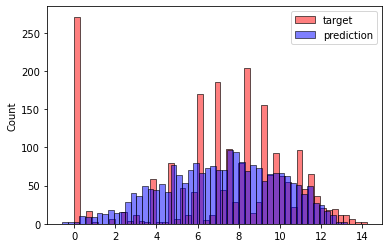

In [197]:
sns.histplot(y_test, label='target', color='red', alpha=0.5, bins=50)
sns.histplot(y_pred, label='prediction', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [198]:
df_model = pd.DataFrame()
df_model['y_test'] = np.expm1(y_test)
df_model['y_pred'] = np.expm1(y_pred)
df_model['delta'] = (df_model.y_test - df_model.y_pred)
df_model.head()

,y_test,y_pred,delta
0,2000.000,314.857,1685.143
1,30000.000,3491.676,26508.324
2,200000.000,154694.062,45305.937
3,100.000,640.842,-540.842
4,500.000,3452.157,-2952.157


In [199]:
df_model.describe()

,y_test,y_pred,delta
count,2238.000,2238.000,2238.000
mean,30262.680,16878.504,13384.175
std,97825.526,43619.770,78690.214
min,0.000,-0.435,-267118.469
25%,300.000,165.288,-316.329
50%,2500.000,1510.971,233.824
75%,20000.000,10512.011,4319.626
max,1500000.000,574472.625,1424383.984


In [200]:
f_imp = model.get_score(importance_type='total_gain')
df_imp = pd.DataFrame.from_dict(f_imp, orient='index', columns=['importance'])
df_imp.sort_values(by='importance', ascending=False).head(10)

,importance
total_time,115050.266
estimated_number_of_persons_displaced,53612.926
"area_of_origin=Trash, Rubbish Storage (inc garbage chute room, garbage/industri",30947.857
extent_of_fire=Confined to object of origin,30522.312
cleaning_time,28744.893
extent_of_fire=Confined to part of room/area of origin,16493.787
fire_time,13781.276
fire_control_time,12702.509
"material_first_ignited=Rubbish, Trash, Waste",8340.399
business_impact=No business interruption,6532.806
